In [111]:
# If you don't yet have these packages, you can uncomment the follow line & and run it
#!pip install numpy pandas matplotlib seaborn sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set_theme()

## Directions

* This examination consists of _2_ problems, each with multiple subproblems. You have between 2 and 3:50pm to work on it.
* It is an open-everything exam. However, don't communicate with another person or AI. The Internet can only be used in read-only mode. **Be reasonable.**
* Problem 1 from the Stats module must be submitted as a PDF file. You can use Maple or Python. Show your work and answer the related questions in the PDF file you're submitting.
* Problem 2 from the Machine Learning module must be submitted as an IPython notebook. You will work directly on this notebook. Show your work and answer all the questions in here.
* Before the time is up, you'll make two separate submissions on Canvas: one for Problem 1 and one for Problem 2.

## Problem 1: Regression (Stats Module)

Labor and material costs are two basic components in the cost of construction. Changes in the
component costs of course lead to changes in total construction costs. The accompanying table
tracks changes in construction cost and cost of all construction materials for 8 consecutive
months.

In [112]:
labor_material = pd.read_csv("cccm.csv")
labor_material

,Month,Construction Cost (y),Index of All Construction Materials (x)
0,January,193.2,180.0
1,February,193.1,181.7
2,March,193.6,184.1
3,April,195.1,185.3
4,May,195.6,185.7
5,June,198.1,185.9
6,July,200.9,187.7
7,August,202.7,189.6


### Your Task
1. Prepare a scatter diagram.
1. Find the least squares straight line.
1. Compute the sample correlation coefficient.
1. Do the data provide sufficient evidence to indicate a nonzero correlation between the monthly construction costs and indexes of all construction materials? Test at $\alpha = 0.05$.
1. Do the residual plot. In your opinion, are the assumptions of the model satisfied?

<hr />

In [113]:
X = labor_material.iloc[:, 2]
X

0    180.0
1    181.7
2    184.1
3    185.3
4    185.7
5    185.9
6    187.7
7    189.6
Name:  Index of All Construction Materials (x), dtype: float64

In [114]:
Y = labor_material.iloc[:, 1]
Y

0    193.2
1    193.1
2    193.6
3    195.1
4    195.6
5    198.1
6    200.9
7    202.7
Name: Construction Cost (y), dtype: float64

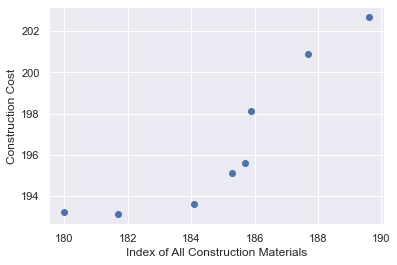

In [115]:
plt.scatter(X, Y)
plt.xlabel("Index of All Construction Materials")
plt.ylabel ("Construction Cost")
plt.show()

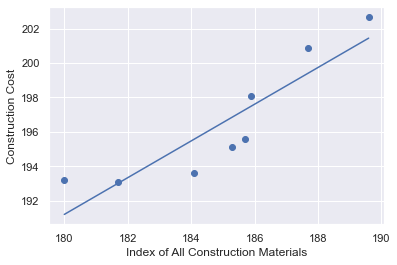

In [116]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(X, Y)

def myfunc(X):
 return slope * X + intercept

mymodel = list(map(myfunc, X))
plt.scatter(X, Y)
plt.plot(X, slope * X + intercept)
plt.xlabel("Index of All Construction Materials")
plt.ylabel ("Construction Cost")
plt.show()

In [117]:
print('Correlation:', r)

Correlation: 0.8993640374131749


In [118]:
p

0.002359556529633942

## Problem 2: Hodgepodges (Machine Learning Module)

Consider the following dataset. Each row has 7 sensor readings (x0, x1, ..., x6) and a label column (y).

In [119]:
sensors_meh = pd.read_csv("muzoo.csv")
sensors_meh.head()

,x0,x1,x2,x3,x4,x5,x6,y
0,-4.597071,-2.999242,-5.735565,-3.984228,-5.149052,-7.775142,-3.785790,1.0
1,8.130288,5.906141,6.174752,2.137881,8.168127,5.449366,4.690545,0.0
2,-5.506438,-2.172412,-5.438821,-2.389202,-3.391176,-6.585607,-2.252300,1.0
3,2.722533,-1.120358,-1.180225,-2.296887,-1.722477,-0.065035,-0.809943,1.0
4,-6.638931,-3.538184,-4.431006,-5.122881,-5.451171,-7.744939,-3.800036,1.0


### Problem 2.1: Train, Test, Classify

1. Prepare training and validation data from the given data set. The train/validate split ratio shoule be 80:20.

1. Train _TWO_ classification models and report the test accuracy of each trained model. The two models can be of the same learning algorithm with different hyperparameters, or they can be two different learning algorithms.

1. Choose the better model, perform 5-fold cross validation, and report the average accuracy, along with the standard deviation. 

1. Suggest a way to improve the classification accuracy

In [120]:
# Begin your work for this problem here. Add additional cells as you see fit. Switch to Markdown mode if you want to type up text-based answers
# Math mode using LaTeX-like syntax (e.g., $x = 2 + y$) works in Markdown mode as well.

In [121]:
from sklearn import preprocessing
string_to_int = preprocessing.LabelEncoder()                    
df = sensors_meh.apply(string_to_int.fit_transform)
df

,x0,x1,x2,x3,x4,x5,x6,y
0,229,108,74,82,36,37,23,1
1,882,991,826,680,897,679,936,0
2,92,275,92,317,219,135,206,1
3,624,498,495,334,410,514,440,1
4,10,61,182,5,14,38,22,1
...,...,...,...,...,...,...,...,...
995,648,383,446,3,386,420,557,1
996,512,714,767,978,728,861,773,0
997,488,601,649,910,484,841,732,0
998,289,201,195,475,259,219,348,1


In [122]:
X = df[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']].to_numpy()
X

array([[229, 108,  74, ...,  36,  37,  23],
       [882, 991, 826, ..., 897, 679, 936],
       [ 92, 275,  92, ..., 219, 135, 206],
       ...,
       [488, 601, 649, ..., 484, 841, 732],
       [289, 201, 195, ..., 259, 219, 348],
       [630, 538, 512, ..., 468, 573, 584]], dtype=int64)

In [123]:
Y = df['y']
Y

0      1
1      0
2      1
3      1
4      1
      ..
995    1
996    0
997    0
998    1
999    1
Name: y, Length: 1000, dtype: int64

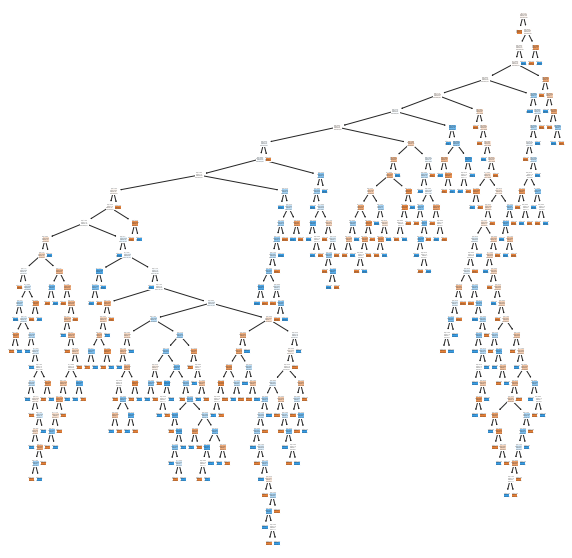

In [124]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(10,10))
sensors_dt = DecisionTreeClassifier(criterion='entropy')
sensors_dt.fit(X,Y)
plot_tree(sensors_dt, filled=True)
plt.show()

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.2, random_state=32)

In [126]:
sensors_dt = DecisionTreeClassifier(criterion='entropy')
sensors_dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

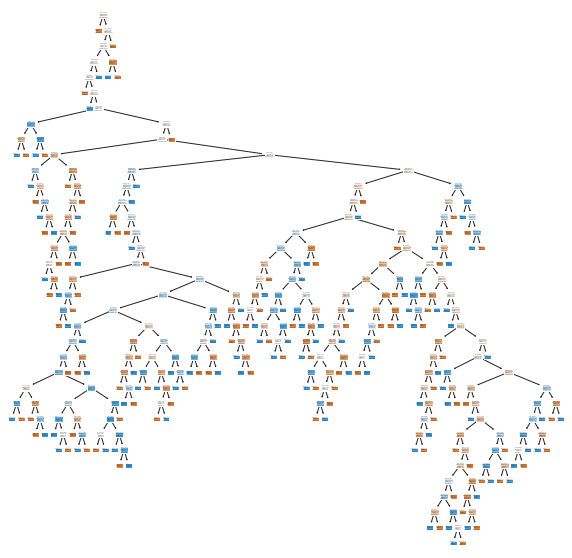

In [127]:
plt.figure(figsize=(10,10))
plot_tree(sensors_dt, filled=True)
plt.show()

In [128]:
train_acc = (Y_train == sensors_dt.predict(X_train)).sum()/len(Y_train)
print('train:', train_acc)

train: 1.0


In [129]:
test_acc = (Y_test == sensors_dt.predict(X_test)).sum()/len(Y_test)
print('test:', test_acc)

test: 0.515


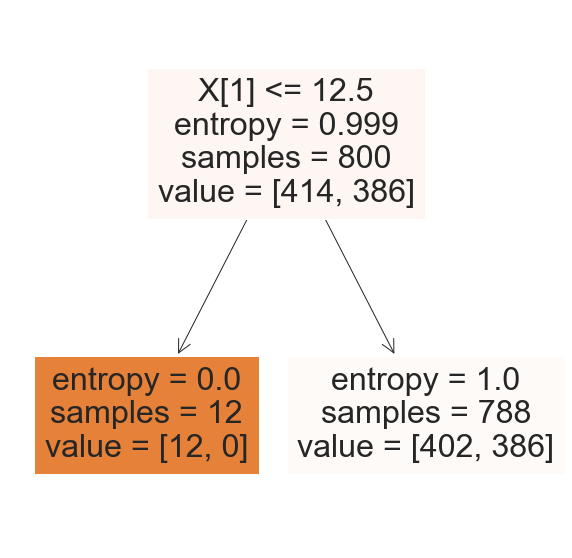

In [130]:
sensors_dt = DecisionTreeClassifier(criterion='entropy', max_depth=1)
sensors_dt.fit(X_train,Y_train)

plt.figure(figsize=(10,10))
plot_tree(sensors_dt, filled=True)
plt.show()

In [131]:
sensors_dt = DecisionTreeClassifier(criterion='entropy')
sensors_dt.fit(X2_train,Y2_train)

DecisionTreeClassifier(criterion='entropy')

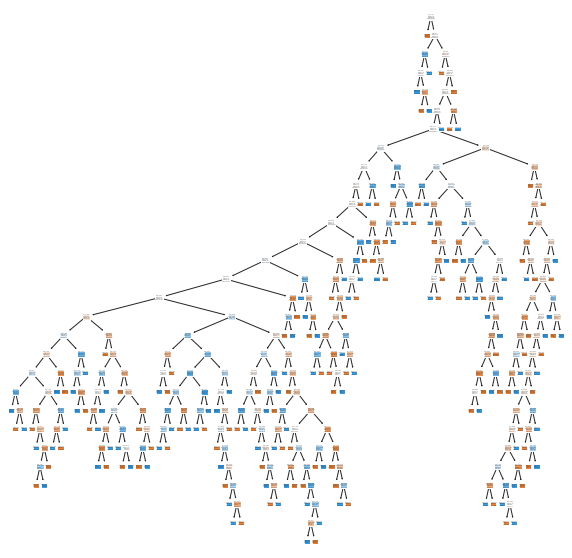

In [132]:
plt.figure(figsize=(10,10))
plot_tree(sensors_dt, filled=True)
plt.show()

In [133]:
train_acc = (Y_train == sensors_dt.predict(X2_train)).sum()/len(Y2_train)
print('train:', train_acc)

train: 0.475


In [134]:
test_acc = (Y_test == sensors_dt.predict(X2_test)).sum()/len(Y2_test)
print('test:', test_acc)

test: 0.47


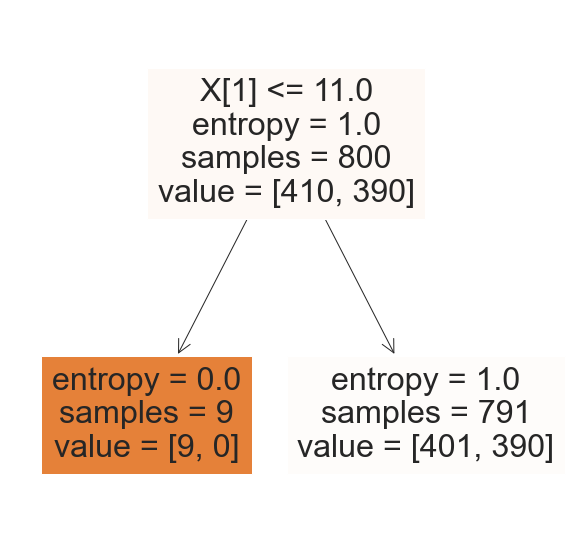

In [135]:
sensors_dt = DecisionTreeClassifier(criterion='entropy', max_depth=1)
sensors_dt.fit(X2_train,Y2_train)

plt.figure(figsize=(10,10))
plot_tree(sensors_dt, filled=True)
plt.show()

In [136]:
#Have more samples to use in order to have higher accuracy

### Problem 2.2: Smashing Dimensions

When we have a dataset in 7 dimensions, visually understanding it in the current form is nearly impossible. To get us started, below are their pair plots, showing the scatter plot for each pair of dimensions (xi vs xj), excluding the label column.

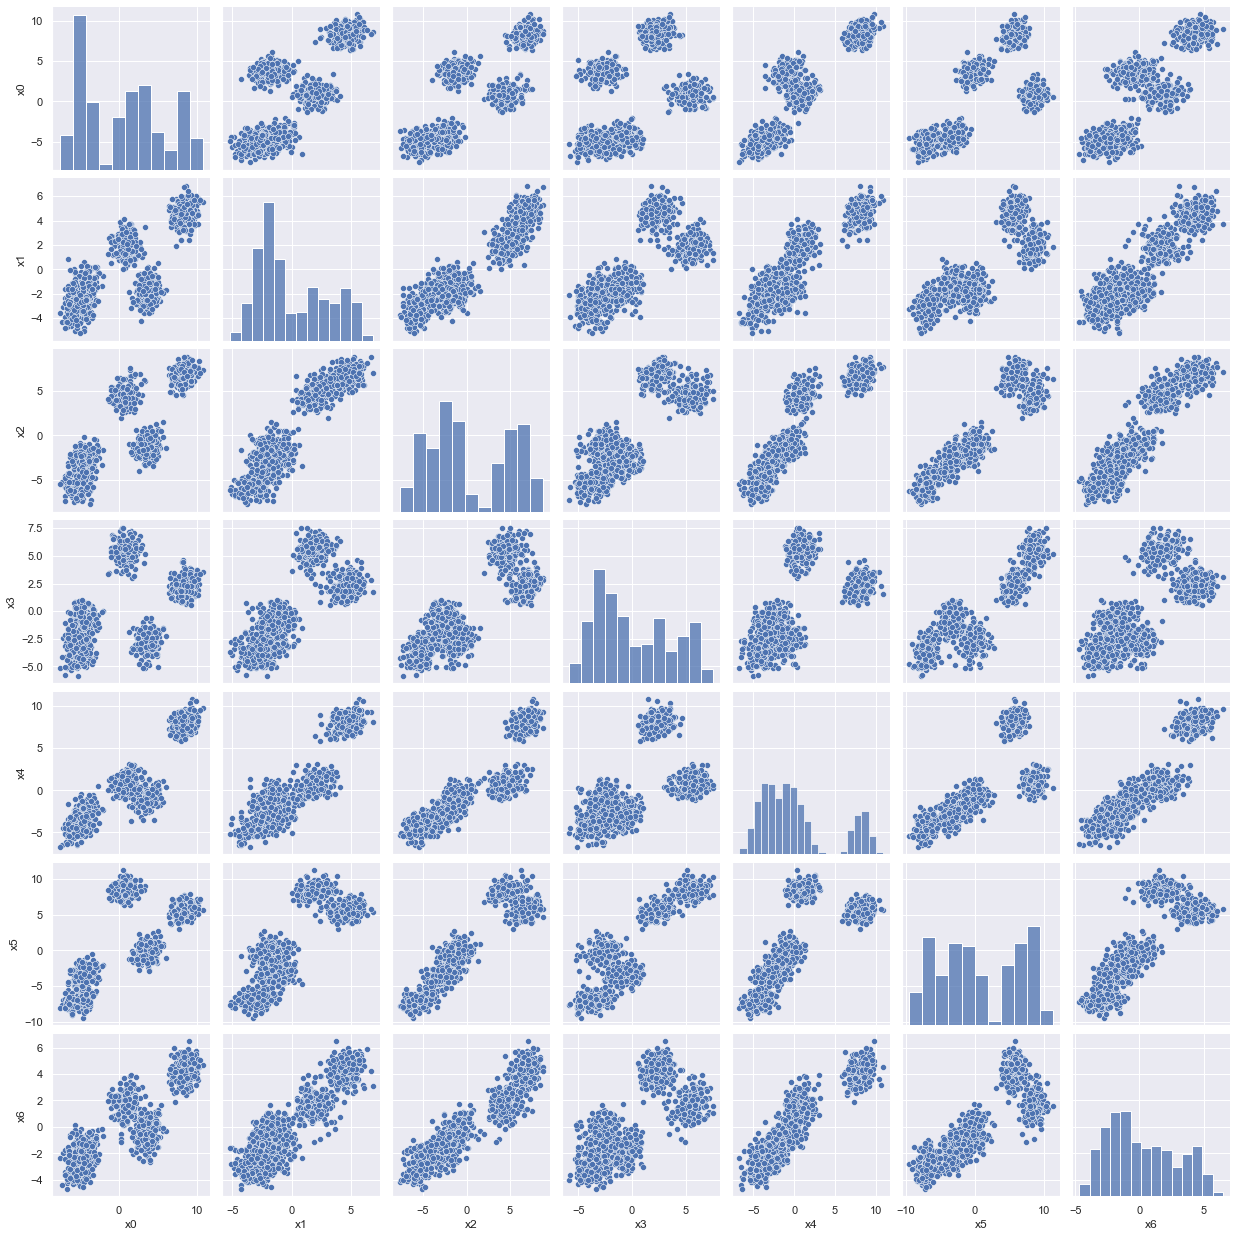

In [137]:
sns.pairplot(sensors_meh.iloc[:,:-1])

We will drill down further. Towards this goal, we'd like to reduce the dimensions down to the bare minimum. For this part, you'll **only use x1, ..., x6; ignore the labels**.

**Your Task:** Apply PCA (properly) to this dataset. You must show your work. Explain your reasoning as you go along.

1. How many dimensions should be kept? Our goal is to use the fewest dimensions that will have at least 90% variance explained. (*Hint:* ≤ 3 dimensions, so their scatter plot can be visually displayed.)
1. How did you figure this out and confirm it?  
1. Optionally (no credit but it might help you understand the nature of the data a bit more), what does the reduced-dimension dataset look like? Show a scatter plot.

In [140]:
# Begin your work for this problem here. Add additional cells as you see fit. Switch to Markdown mode if you want to type up text-based answers
# Math mode using LaTeX-like syntax (e.g., $x = 2 + y$) works in Markdown mode as well.

In [147]:
sensors_data = sensors_meh[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']]

,x0,x1,x2,x3,x4,x5,x6
0,-4.597071,-2.999242,-5.735565,-3.984228,-5.149052,-7.775142,-3.785790
1,8.130288,5.906141,6.174752,2.137881,8.168127,5.449366,4.690545
2,-5.506438,-2.172412,-5.438821,-2.389202,-3.391176,-6.585607,-2.252300
3,2.722533,-1.120358,-1.180225,-2.296887,-1.722477,-0.065035,-0.809943
4,-6.638931,-3.538184,-4.431006,-5.122881,-5.451171,-7.744939,-3.800036
...,...,...,...,...,...,...,...
995,3.129995,-1.742102,-1.585988,-5.176295,-1.967251,-1.373296,0.184944
996,1.090868,2.068314,5.183521,6.393068,1.184760,8.023555,2.529361
997,0.800255,0.486930,3.786300,5.581775,-1.039310,7.804696,2.060518
998,-4.219473,-2.494010,-4.128351,-1.009768,-3.068228,-4.434297,-1.382763


In [149]:
from sklearn.preprocessing import StandardScaler
sensors_standardized = StandardScaler().fit_transform(sensors_data)

In [150]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
sensors_2d = pca.fit_transform(sensors_standardized)

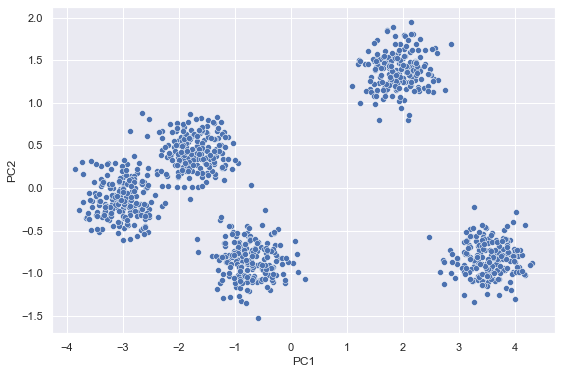

In [152]:
plt.figure(figsize = (9, 6))
plt.xlabel("PC1")
plt.ylabel("PC2")
sns.scatterplot(x = sensors_2d[:, 0], y = sensors_2d[:, 1]);

In [153]:
sensors_2d_variance = pca.explained_variance_ratio_
sensors_2d_variance

array([0.83705918, 0.10658688, 0.03182649, 0.01059566, 0.00644268,
       0.00439301, 0.0030961 ])

In [ ]:
# We only need to keep x0, as it is shown to have the highest variance

### Problem 2.3: Cluster 'Em

This (sub)problem will be a continuation of the previous one. You should **use the reduced-dimension dataset**; however, if you are unable to, you can use the initial dataset. Hence, for this part, too, you'll **ignore the labels**.


**Your Task:** Apply a clustering algorithm from class (K-Means, Agglomerative clustering) to the (reduced-dimension) dataset. You must show your work. Explain your reasoning as you go along.

1. What is the best number of clusters? How did you determine that?
1. Generate a clustering using the above number of clusters. Your variable `labels` will be a list or a numpy array where `labels[i]` indicates which cluster the data point in row `i` is. More specifically, if there are `k` clusters, `labels[i]` is a number between $0$ and $k-1$ (inclusive). 
1. Optionally (no credit), plot the dataset color-coding each point so we know which cluster it belongs to.

In [139]:
# Begin your work for this problem here. Add additional cells as you see fit. Switch to Markdown mode if you want to type up text-based answers
# Math mode using LaTeX-like syntax (e.g., $x = 2 + y$) works in Markdown mode as well.

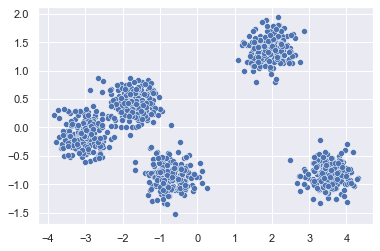

In [154]:
sns.scatterplot(x = sensors_2d[:, 0], y = sensors_2d[:, 1]);

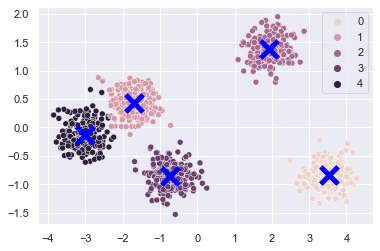

In [157]:
from sklearn import cluster
from sklearn import preprocessing
kmeans = cluster.KMeans(n_clusters = 5, random_state = 42).fit(sensors_2d)
sns.scatterplot(x = sensors_2d[:, 0], y = sensors_2d[:, 1], hue = kmeans.labels_)
sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1], color = 'blue', marker = 'x', s = 300, linewidth = 5);

In [ ]:
# Best number of clusters would be 2, as it is not close to any other clusters
# meaning that there would be no mixups
# And it has closer clustering than 0 (more compact)